In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Fruits2

/content/gdrive/MyDrive/Fruits2


In [ ]:
!unzip \*.zip  && rm *.zip

In [ ]:



print("[INFO] loading network...")
model = VGG16(weights="imagenet", include_top=False)
le = None
print("[INFO] network loaded...")

[INFO] loading network...
58892288/58889256 [==============================] - 0s 0us/step
[INFO] network loaded...


In [ ]:
from tensorflow.keras.preprocessing.image import load_img
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array

In [ ]:

# loop over the data splits
def create_dataset(img_folder):
   
    image_path=[]
    labels=[]
       
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):       
            image_path.append(os.path.join(img_folder, dir1,file))
            label= dir1.split('_')[0]
            labels.append(label)
       
    return image_path,labels
# extract the image array and class name

In [ ]:
img_data_path,train_labels =create_dataset('/content/gdrive/MyDrive/Fruits2/dataset/dataset/train')

In [ ]:
img_Testdata_path,test_labels= create_dataset('/content/gdrive/MyDrive/Fruits2/dataset/dataset/test')

In [ ]:
len(img_data_path)

10901

In [ ]:
BATCH_SIZE=32

In [ ]:
def extractedFeatures(images,labels,string):
  csvPath = os.path.sep.join(["/content/gdrive/MyDrive/Fruits2/dataset/dataset/"+string+".csv"])
  csv = open(csvPath, "w")
  
  for (b, i) in enumerate(range(0, len(images), BATCH_SIZE)):
    # extract the batch of images and labels, then initialize the
    # list of actual images that will be passed through the network
    # for feature extraction
   
    print("[INFO] processing batch {}/{}".format(b + 1,int(np.ceil(len(images)) / float(BATCH_SIZE))))
    batchPaths = images[i:i + BATCH_SIZE]
    
    batchLabels = labels[i:i + BATCH_SIZE]
    batchImages = []
    # loop over the images and labels in the current batch
    for img_path in batchPaths:
      
      #if os.path.isdir(img_path):
      #  continue  
      # load the input image using the Keras helper utility
      # while ensuring the image is resized to 224x224 pixels
      
      image = load_img(img_path, target_size=(224, 224))
      image = img_to_array(image)
      # preprocess the image by (1) expanding the dimensions and
      # (2) subtracting the mean RGB pixel intensity from the
      # ImageNet dataset
      image = np.expand_dims(image, axis=0)

      image = preprocess_input(image)
      # add the image to the batch
      batchImages.append(image)
      
      # pass the images through the network and use the outputs as
      # our actual features, then reshape the features into a
      # flattened volume
    batchImages = np.vstack(batchImages)
    features = model.predict(batchImages, batch_size=BATCH_SIZE)
    features = features.reshape((features.shape[0], 7 * 7 * 512))
    # loop over the class labels and extracted features

    for (label, vec) in zip(batchLabels, features):
      # construct a row that exists of the class label and
      # extracted features
      vec = ",".join([str(v) for v in vec])
      csv.write("{},{}\n".format(label, vec))
    # close the CSV file
  print("CSV file Created!")
  csv.close()
  # serialize the label encoder to disk*/


In [ ]:
extractedFeatures(img_data_path, train_labels, 'fruitsTraining')

In [ ]:
model.save("/content/gdrive/MyDrive/Fruits2/dataset/dataset/fruit_quality_model.h5")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
from imutils import paths
import cv2
import os
import numpy as np

In [ ]:
# import the necessary packages
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import numpy as np

def load_data_split(splitPath):
	# initialize the data and labels
	data = []
	labels = []
	# loop over the rows in the data split file
	for row in open(splitPath):
		# extract the class label and features from the row
		row = row.strip().split(",")
		label = row[0]
		features = np.array(row[1:], dtype="float")
		# update the data and label lists
		data.append(features)
		labels.append(label)
	# convert the data and labels to NumPy arrays
	data = np.array(data)
	labels = np.array(labels)
	# return a tuple of the data and labels
	return (data, labels)

In [ ]:
print("[INFO] loading data...")
(trainX, trainY) = load_data_split(os.path.sep.join(["/content/gdrive/MyDrive/Fruits2/dataset/dataset/fruitsTrain (6).csv"]))
(testX, testY) = load_data_split(os.path.sep.join(["/content/gdrive/MyDrive/Fruits2/dataset/dataset/fruitsTest.csv"]))

[INFO] loading data...


In [ ]:
trainX

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 5.1462297,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 6.5454803,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

In [ ]:
print("[INFO] training model...")
model1 = LogisticRegression(solver="lbfgs", multi_class="auto",
	max_iter=300)
model1.fit(trainX, trainY)

[INFO] training model...


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:

print("[INFO] evaluating...")
preds = model1.predict(testX)
print(f"Accuracy: {metrics.accuracy_score(testY,preds)}")
print(classification_report(testY, preds))

[INFO] evaluating...
Accuracy: 0.9970348406226834
              precision    recall  f1-score   support

       fresh       1.00      1.00      1.00      1164
      rotten       1.00      1.00      1.00      1534

    accuracy                           1.00      2698
   macro avg       1.00      1.00      1.00      2698
weighted avg       1.00      1.00      1.00      2698



In [ ]:
import pickle
print("[INFO] saving model...")
f = open('/content/gdrive/MyDrive/Fruits2/dataset/dataset/Classifier', "wb")
f.write(pickle.dumps(model1))
f.close()

[INFO] saving model...


In [ ]:
import numpy as np

In [ ]:
from google.colab import files
import tensorflow as tf
from tensorflow.keras.models import load_model
model2=tf.keras.models.load_model("/content/gdrive/MyDrive/Fruits2/dataset/dataset/fruit_quality_model.h5")
#model1=tf.keras.models.load_model("/content/gdrive/MyDrive/Fruits2/dataset/dataset/Classifier")
import imutils
import cv2
from imutils import paths
import os
from google.colab.patches import cv2_imshow

def predictFruit():  
  im = files.upload()
  im2= cv2.imread(list(im.keys())[0])
  output = im2.copy()
  output = imutils.resize(output, width=400)
  image = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image, (224, 224))
  # convert the image to a floating point data type and perform mean
  # subtraction
  image = image.astype("float32")
  mean = np.array([123.68, 116.779, 103.939][::-1], dtype="float32")
  image -= mean
  image = load_img(list(im.keys())[0], target_size=(224, 224))
  image = img_to_array(image)
      # preprocess the image by (1) expanding the dimensions and
      # (2) subtracting the mean RGB pixel intensity from the
      # ImageNet dataset
  image = np.expand_dims(image, axis=0)

  image = preprocess_input(image)

  feature = model2.predict(image)
  feature= feature.reshape((feature.shape[0], 7 * 7 * 512))
  preds = model1.predict(feature)
  text = "Prediction: {}".format(preds[0])
  cv2.putText(output, text, (3, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
    (0,0, 255), 2)
  cv2_imshow(output)
  cv2.waitKey(0)

  


Saving Guava 4.12 6 AM 4.jpg to Guava 4.12 6 AM 4.jpg


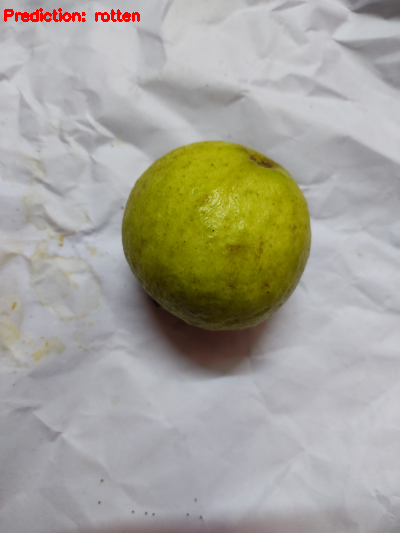




 Do you want to predict more fruits? Y/N :Y


Saving Guava 3.12 12 PM 1 .jpg to Guava 3.12 12 PM 1 .jpg


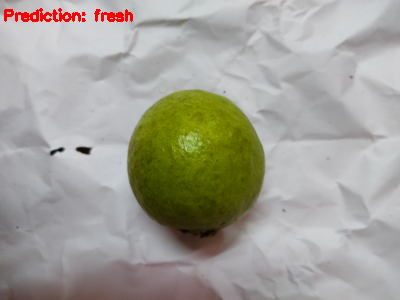




 Do you want to predict more fruits? Y/N :Y


Saving Guava 4.12 12 AM 2.jpg to Guava 4.12 12 AM 2.jpg


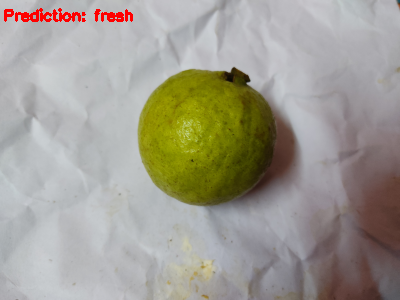




 Do you want to predict more fruits? Y/N :Y


Saving Guava 20.12 12 AM 3.jpg to Guava 20.12 12 AM 3.jpg


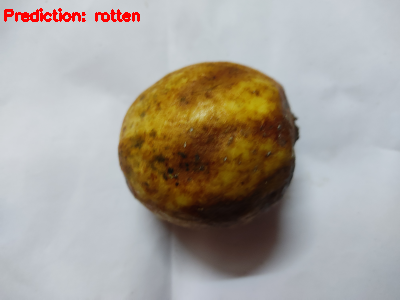

In [ ]:
condition = True
while condition:
  predictFruit()
  cont=input("\n\n\n Do you want to predict more fruits? Y/N :")
  if cont.upper() == 'Y':
    continue
  elif cont.upper()=='N':
    condition = False